# Silence Threshold

We use this notebook to tune the threshhold to set for silence on the LJ Speech dataset.

In [1]:
import re
import sys

# Setup the "PYTHONPATH"
sys.path.insert(0, '../')

In [2]:
from src.datasets import lj_speech_dataset
data = lj_speech_dataset(directory='../data', verbalize=False)

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0126.wav
Diff: 0.16216216216216217
Max Signal: 0.0051160958
Start: 185
Signal:


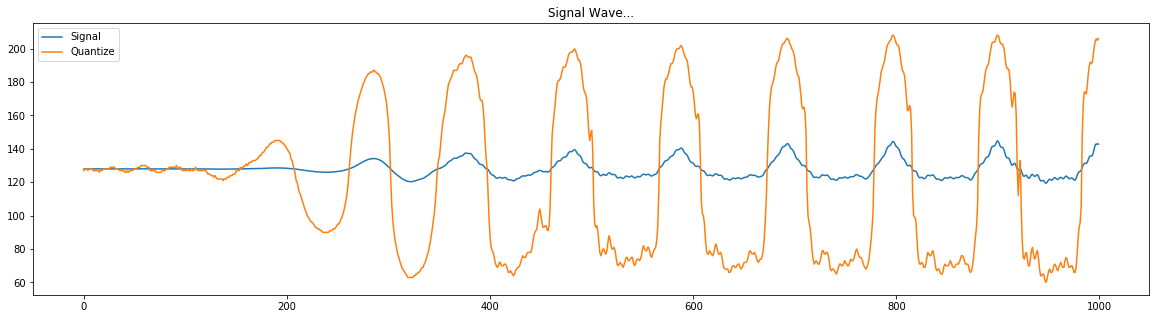

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0172.wav
Diff: 3.7083333333333335
Max Signal: 0.0059900167
Start: 48
Signal:


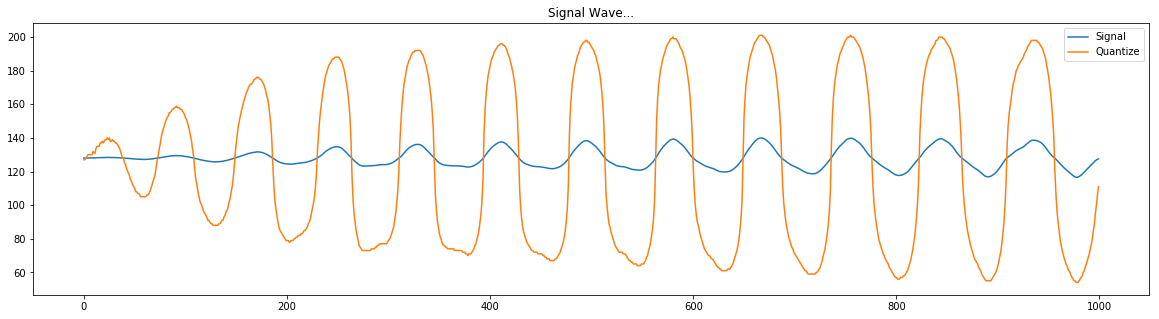

Wav: ../data/LJSpeech-1.1/wavs/LJ001-0173.wav
Diff: 5.6875
Max Signal: 0.0057310085
Start: 16
Signal:


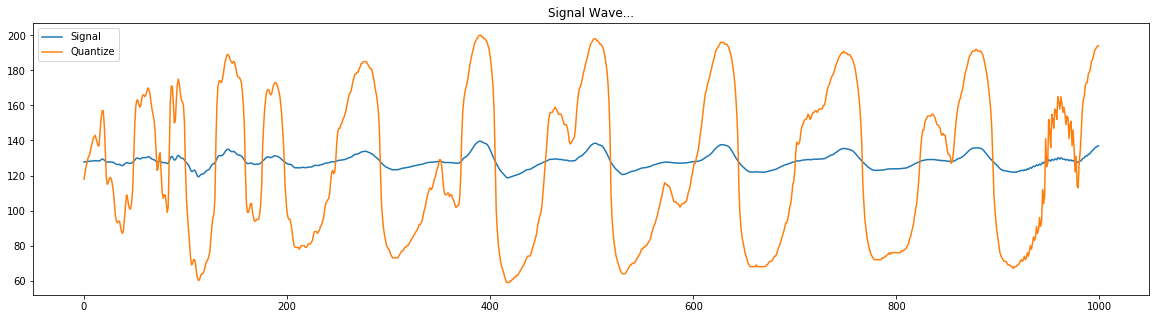

Wav: ../data/LJSpeech-1.1/wavs/LJ002-0134.wav
Diff: 11.214285714285714
Max Signal: 0.0036462583
Start: 28
Signal:


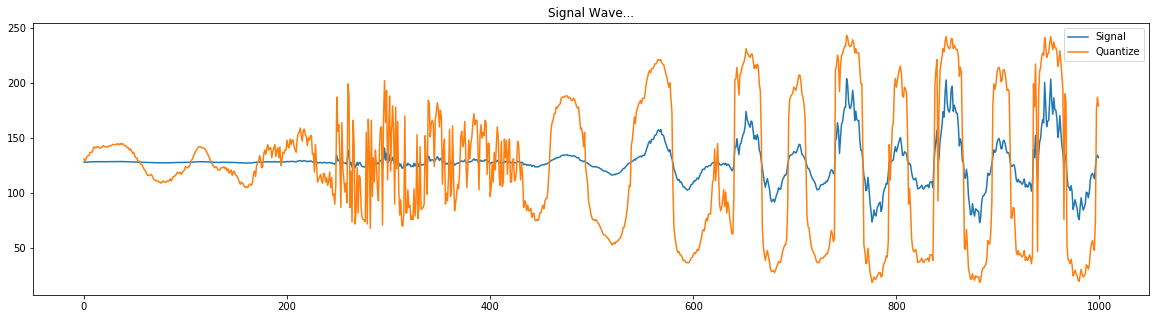

Wav: ../data/LJSpeech-1.1/wavs/LJ002-0204.wav
Diff: 13.476190476190476
Max Signal: 0.0017693057
Start: 21
Signal:


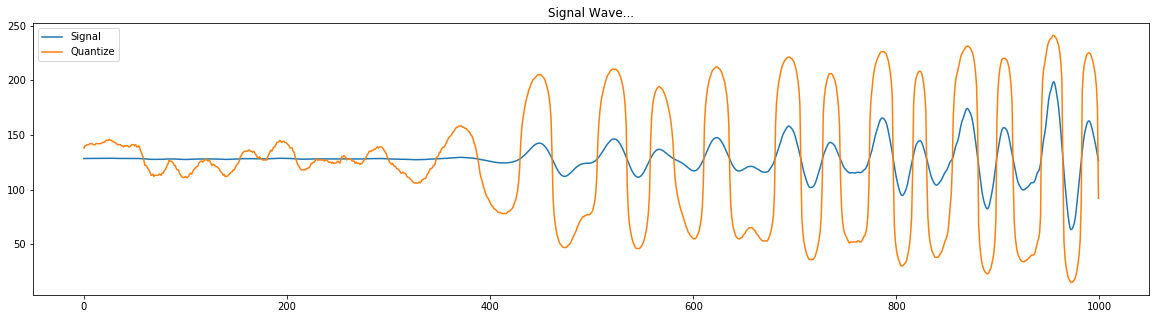

Wav: ../data/LJSpeech-1.1/wavs/LJ010-0234.wav
Diff: 13.714285714285714
Max Signal: 0.0011743291
Start: 14
Signal:


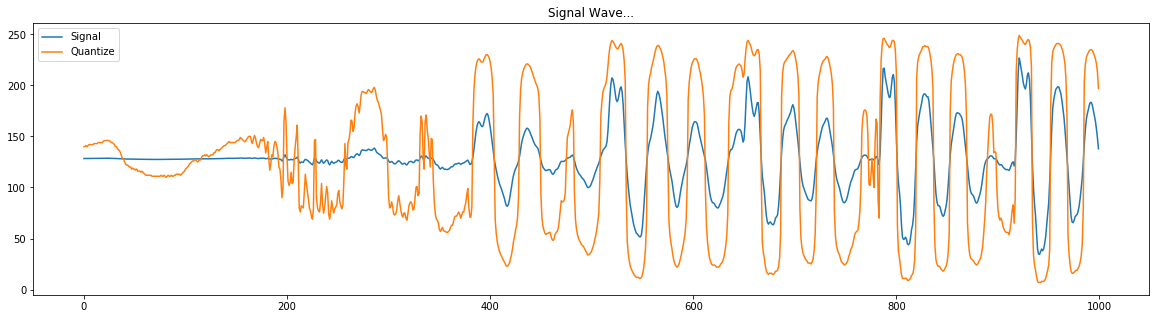

Wav: ../data/LJSpeech-1.1/wavs/LJ021-0179.wav
Diff: 14.714285714285714
Max Signal: 0.00038614497
Start: 21
Signal:


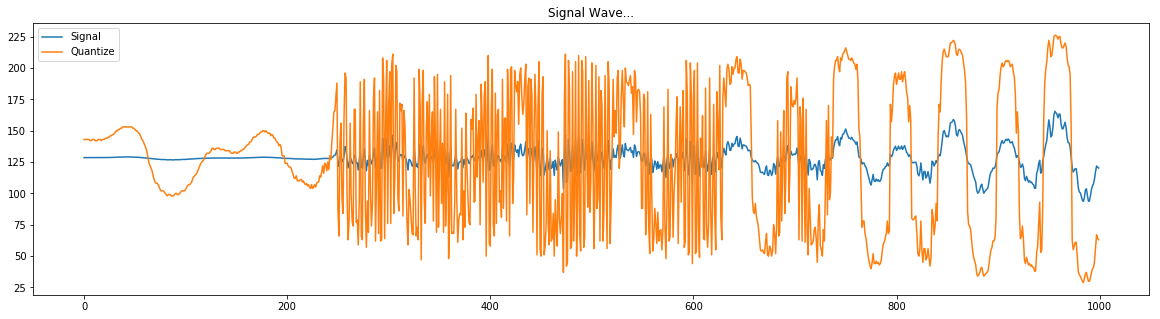

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from src.preprocess import read_audio
from src.preprocess import mu_law_quantize


def trim_silence(quantized, silence_threshold=10):
    for start in range(quantized.size):
        if abs(quantized[start] - mu_law_quantize(0)) > silence_threshold:
            break
            
    for end in range(quantized.size - 1, 1, -1):
        if abs(quantized[end] - mu_law_quantize(0)) > silence_threshold:
            break

    return start, end

max_diff = 0

for row in data:
    signal, sample_rate = read_audio(row['wav'])
    quantize = mu_law_quantize(signal)
    start, end = trim_silence(quantize)
    if start > 10:
        diff = sum(quantize[:start] - mu_law_quantize(0)) / start
        if diff >= max_diff:
            max_diff = diff
            print('Wav:', row['wav'])
            print('Diff:', diff)
            print('Max Signal:', max(signal[:start]) - min(signal[:start]))
            print('Start:', start)
            print('Signal:')
            plt.figure(figsize=(20,5))
            plt.title('Signal Wave...')
            plt.plot(((signal[:1000] + 1) / 2 * 256), label='Signal')
            plt.plot(quantize[:1000], label='Quantize')
            plt.legend()
            plt.show()